In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import svm 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:\Users\hello\Desktop\WineData\winequality-white.csv",delimiter = ";")
print(data)
#X = np.array(data.loc['fixed acidity':'alcohol'])
#Y = np.array(data.loc['quality'])
quality=data['quality'].values
label1=[]
for i in quality:
    if i<=5:
        label1.append("low") 
    if i==6 or i==7:
        label1.append("medium")
    if i>7:
        label1.append("high")
#print(label1)
d={'label': label1}
df = pd.DataFrame(d)
new_data=data.drop(['quality'], axis=1)
temp=[new_data,df]
final_data=pd.concat(temp,axis=1)
print(final_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               7.2             0.230         0.32            8.50      0.058   
5               8.1             0.280         0.40            6.90      0.050   
6               6.2             0.320         0.16            7.00      0.045   
7               7.0             0.270         0.36           20.70      0.045   
8               6.3             0.300         0.34            1.60      0.049   
9               8.1             0.220         0.43            1.50      0.044   
10              8.1             0.270         0.41            1.45      0.033   
11              8.6         

In [3]:
sd=StandardScaler(copy=True) #standarddising the dataset
new_data1=data.drop(['quality'], axis=1)
print(new_data1)
s_final_data=sd.fit_transform(new_data1)
s_final_data=pd.DataFrame(s_final_data)
print(s_final_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               7.2             0.230         0.32            8.50      0.058   
5               8.1             0.280         0.40            6.90      0.050   
6               6.2             0.320         0.16            7.00      0.045   
7               7.0             0.270         0.36           20.70      0.045   
8               6.3             0.300         0.34            1.60      0.049   
9               8.1             0.220         0.43            1.50      0.044   
10              8.1             0.270         0.41            1.45      0.033   
11              8.6         

           PC1       PC2   label
0     3.676944 -0.545233  medium
1    -0.644588  0.430770  medium
2     0.155291 -1.189800  medium
3     1.455374  0.099680  medium
4     1.455374  0.099680  medium
5     0.155291 -1.189800  medium
6     0.073836  0.829319  medium
7     3.676944 -0.545233  medium
8    -0.644588  0.430770  medium
9    -0.558664 -1.326730  medium
10   -2.253152 -2.615073     low
11   -0.031626 -1.990984     low
12   -1.596429 -1.351440     low
13   -1.578318  1.517245  medium
14    3.658082 -1.848068     low
15   -1.719565  0.036043  medium
16   -1.336107  0.973094  medium
17   -3.043974  0.036691    high
18   -0.977799 -0.934052  medium
19    0.295222  0.941402     low
20   -3.043974  0.036691    high
21   -1.728033 -0.651120  medium
22   -0.743867  0.841572    high
23    0.391888 -0.247958     low
24   -0.471539  0.507450  medium
25    1.860406  1.158911  medium
26   -0.536219  0.853769  medium
27    0.516948  0.522462  medium
28   -1.380107 -1.188639  medium
29   -1.66

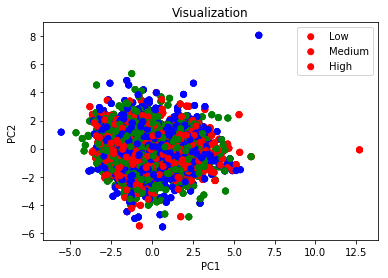

[0.29293217 0.14320363]


In [4]:
#visualizing the dataset using PCA 
pca = PCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(s_final_data),columns = ['PC1', 'PC2'])
final_transformed = pd.concat([transformed, df], axis = 1)
#print(pca.explained_variance_ratio_)  #variance by each features like here alcohol fixed acid...
#temp1=[s_final_data,df]
#final_data=pd.concat(temp1,axis=1)
print(final_transformed)
targets = ['Low','Medium','High']
colors = ['r', 'g', 'b']
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualization')
for target, color in zip(targets,colors):
    plt.scatter(final_transformed['PC1'], final_transformed['PC2'], c=colors, cmap=plt.cm.coolwarm)
plt.legend(targets)
plt.show()
print(pca.explained_variance_ratio_)

In [6]:
features=s_final_data.columns
print(features)
X=np.array(s_final_data)
Y=np.array(df)
print(X)
print(Y)

RangeIndex(start=0, stop=11, step=1)
[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01 ... -1.24692128e+00
  -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 ...  7.40028640e-01
   1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01 ...  4.75101984e-01
  -4.36815783e-01 -3.36667007e-01]
 ...
 [-4.20473102e-01 -3.79435433e-01 -1.19159198e+00 ... -1.31315295e+00
  -2.61552731e-01 -9.05543789e-01]
 [-1.60561323e+00  1.16673788e-01 -2.82557040e-01 ...  1.00495530e+00
  -9.62604939e-01  1.85757201e+00]
 [-1.01304317e+00 -6.77100966e-01  3.78559282e-01 ...  4.75101984e-01
  -1.48839409e+00  1.04489089e+00]]
[['medium']
 ['medium']
 ['medium']
 ...
 ['medium']
 ['medium']
 ['medium']]


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)
C = 1.0  # SVM regularization parameter
#linear kernel
clf_l = svm.SVC(kernel='linear', C=1.0)
#clf_l.fit(X_train, y_train)
#y_pred = clf_l.predict(X_test)
cv = ShuffleSplit(n_splits=25, test_size=0.2)
accuracies = cross_validate(clf_l, X,Y, cv = cv)
print(accuracies['test_score'])
print(max(accuracies['test_score']))
print(sum(accuracies['test_score'])/len(accuracies['test_score']))

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)
C = 1.0  # SVM regularization parameter
#LINEAR kernel LINEAR_SVC
clf_linearK = lin_svc = svm.LinearSVC(C=1.0)
#clf_linearK.fit(X_train, y_train)
#y_pred = clf_linearK.predict(X_test)
cv = ShuffleSplit(n_splits=25, test_size=0.2)
accuracies = cross_validate(clf_linearK, X,Y, cv = cv)
print(accuracies['test_score'])
print(max(accuracies['test_score']))

[0.72653061 0.71836735 0.73469388 0.70816327 0.72142857 0.73877551
 0.69897959 0.71938776 0.71020408 0.72040816 0.73367347 0.71122449
 0.72346939 0.73265306 0.71734694 0.72653061 0.72244898 0.71938776
 0.72040816 0.71734694 0.69897959 0.72142857 0.72244898 0.7122449
 0.69387755]
0.7387755102040816


In [9]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
#rbf kernel
clf_rbf = svm.SVC(kernel='rbf', gamma=0.9, C=1.0)
#clf_rbf.fit(X_train, y_train)
#y_pred = clf_l.predict(X_test)
cv = ShuffleSplit(n_splits=25, test_size=0.2)
accuracies = cross_validate(clf_rbf, X,Y, cv = cv)
print(accuracies['test_score'])
print(max(accuracies['test_score']))

[0.78061224 0.81020408 0.76938776 0.76938776 0.7744898  0.75408163
 0.79285714 0.76530612 0.76428571 0.77040816 0.78265306 0.75102041
 0.7622449  0.76938776 0.79183673 0.76632653 0.77346939 0.77959184
 0.77142857 0.77857143 0.78265306 0.76530612 0.76122449 0.77244898
 0.77653061]
0.810204081632653


In [10]:
# polynomial kernel
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
clf_poly = svm.SVC(kernel='poly', degree=3, C=1.0)
#clf_poly.fit(X_train, y_train)
#y_pred = clf_poly.predict(X_test)
cv = ShuffleSplit(n_splits=25, test_size=0.2)
accuracies = cross_validate(clf_poly, X,Y, cv = cv)
print(accuracies['test_score'])
print(max(accuracies['test_score']))

[0.72040816 0.70816327 0.71938776 0.73979592 0.74285714 0.69489796
 0.72040816 0.71734694 0.71530612 0.71428571 0.7        0.69693878
 0.69897959 0.70408163 0.70306122 0.7122449  0.73367347 0.70918367
 0.70714286 0.71326531 0.70204082 0.72142857 0.70714286 0.70816327
 0.73061224]
0.7428571428571429


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
final_data=pd.concat([s_final_data,df],axis=1)
scores_test=[]
for j in range(1,100):
    cv = ShuffleSplit(n_splits=25, test_size=0.2)
    accuracies = cross_validate(clf_rbf, X,Y, cv = cv)
    print(accuracies['test_score'])
    print(max(accuracies['test_score']))
    scores_test.append(max(accuracies['test_score']))
print(scores_test)
print(max(scores_test))
mean=sum(scores_test) / len(scores_test)
print(mean)
#print("Average accuracy is :"+str(scores_test.mean()))

[0.78061224 0.75102041 0.75918367 0.7755102  0.7877551  0.76836735
 0.76836735 0.76734694 0.77857143 0.75918367 0.77244898 0.75816327
 0.77142857 0.78673469 0.78877551 0.76428571 0.75714286 0.78469388
 0.79285714 0.78469388 0.76938776 0.78469388 0.77040816 0.76020408
 0.78877551]
0.7928571428571428
[0.76734694 0.7755102  0.75204082 0.73367347 0.79591837 0.78367347
 0.74795918 0.77857143 0.77857143 0.77040816 0.77040816 0.76734694
 0.7744898  0.75510204 0.76632653 0.75408163 0.7877551  0.7622449
 0.78469388 0.76836735 0.78061224 0.76734694 0.75714286 0.79285714
 0.76938776]
0.7959183673469388
[0.7755102  0.76326531 0.76428571 0.79795918 0.78265306 0.7744898
 0.77040816 0.78163265 0.77857143 0.76632653 0.77959184 0.74795918
 0.76428571 0.77857143 0.75612245 0.78877551 0.78571429 0.78367347
 0.76734694 0.78571429 0.76632653 0.76530612 0.75204082 0.7622449
 0.77142857]
0.7979591836734694
[0.78367347 0.77959184 0.76836735 0.76632653 0.76530612 0.78673469
 0.78367347 0.76734694 0.77040816 0.

[0.79387755 0.78979592 0.78265306 0.7877551  0.77142857 0.78877551
 0.76428571 0.79795918 0.75918367 0.80204082 0.76530612 0.79183673
 0.76836735 0.77346939 0.77244898 0.77653061 0.7744898  0.78061224
 0.75612245 0.77959184 0.76632653 0.76734694 0.77142857 0.7744898
 0.74897959]
0.8020408163265306
[0.76326531 0.74897959 0.77142857 0.78265306 0.76122449 0.7755102
 0.78469388 0.76428571 0.78673469 0.78877551 0.76122449 0.7622449
 0.78367347 0.75918367 0.78163265 0.78673469 0.78571429 0.78367347
 0.76122449 0.7744898  0.76938776 0.75714286 0.79081633 0.79285714
 0.75102041]
0.7928571428571428
[0.79183673 0.76938776 0.77142857 0.77653061 0.7755102  0.78265306
 0.78877551 0.80408163 0.76020408 0.77244898 0.7744898  0.78469388
 0.76020408 0.76122449 0.73979592 0.79795918 0.7755102  0.77244898
 0.77346939 0.79285714 0.76122449 0.77959184 0.78571429 0.77959184
 0.75612245]
0.8040816326530612
[0.76122449 0.76734694 0.76938776 0.75204082 0.76020408 0.75918367
 0.76428571 0.78061224 0.78367347 0.

[0.77959184 0.7622449  0.75306122 0.78571429 0.77346939 0.74795918
 0.75714286 0.8        0.7622449  0.7755102  0.81020408 0.78469388
 0.77755102 0.76734694 0.78265306 0.76020408 0.78673469 0.77959184
 0.76020408 0.8        0.79285714 0.79897959 0.77346939 0.76836735
 0.76530612]
0.810204081632653
[0.76938776 0.76632653 0.76938776 0.75306122 0.78061224 0.76734694
 0.76938776 0.77244898 0.7755102  0.77346939 0.77040816 0.79081633
 0.76734694 0.78163265 0.79897959 0.76938776 0.7744898  0.75
 0.79897959 0.78163265 0.76530612 0.74489796 0.80714286 0.77857143
 0.78673469]
0.8071428571428572
[0.78061224 0.76122449 0.77755102 0.79183673 0.81122449 0.77142857
 0.77755102 0.76428571 0.76836735 0.78571429 0.77653061 0.78265306
 0.77653061 0.79285714 0.78163265 0.77755102 0.80714286 0.77755102
 0.76734694 0.78367347 0.7744898  0.77857143 0.76632653 0.76836735
 0.79183673]
0.8112244897959183
[0.76428571 0.75714286 0.76530612 0.79081633 0.7622449  0.77142857
 0.78163265 0.76428571 0.7755102  0.7704

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = clf_rbf,param_grid = parameters,scoring = 'accuracy',cv = 10,)
grid_search.fit(X,Y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
#here is the best accuracy
print(best_accuracy)
print(best_parameters)